In [5]:
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import numpy as np

In [14]:
def show(img, cmap=None):
    if cmap:
        plt.imshow(img, cmap=cmap)
    else:
        plt.imshow(img)
        
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

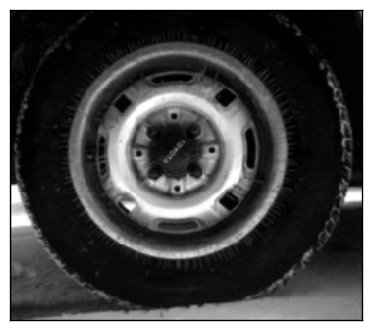

In [31]:
img = misc.imread('image.png')
show(img)

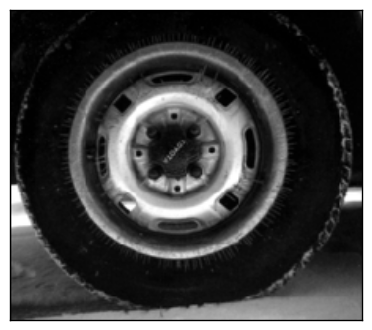

In [34]:
# Convert to grayscale
img = np.array(Image.fromarray(img).convert('L'))
show(img, cmap='gray')

# Histogram Equalization
## Original histogram of the image

In [53]:
L = 256

In [58]:
count_map = np.zeros(L)
values = range(0, L)

In [59]:
for row in img:
    for val in row:
        count_map[val] += 1

In [60]:
count_map = count_map / (img.shape[0] * img.shape[1])

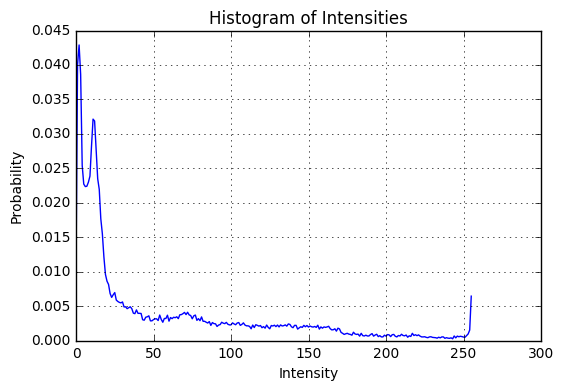

In [61]:
plt.plot(values, count_map)
plt.title('Histogram of Intensities')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

## Transform values

$ s_k = T(r_k) = (L-1) \sum_{j=0}^{r} p_r(r_j) $

In [64]:
transformed_values = []
p_sum = 0

for value in values:
    p_sum += count_map[value]
    tr_value = int(round((L-1) * p_sum))
    transformed_values.append(tr_value)

In [69]:
tr_count_map = np.zeros(L)

In [70]:
for value in values:
    tr_count_map[transformed_values[value]] += count_map[value]

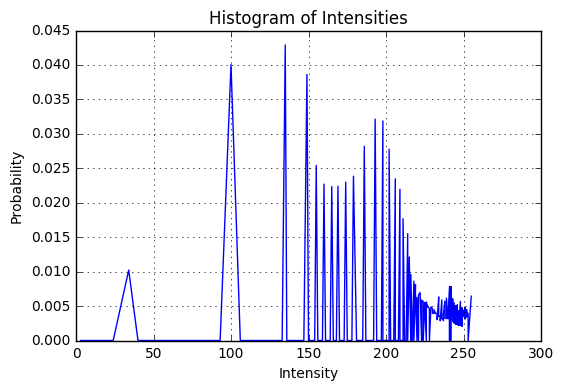

In [78]:
plt.plot(transformed_values, tr_count_map)
plt.title('Histogram of Intensities')
plt.xlabel('Intensity')
plt.ylabel('Probability')
plt.grid(True)
plt.show()

In [73]:
for i, row in enumerate(img):
    for j, col in enumerate(row):
        img[i, j] = transformed_values[img[i, j]]

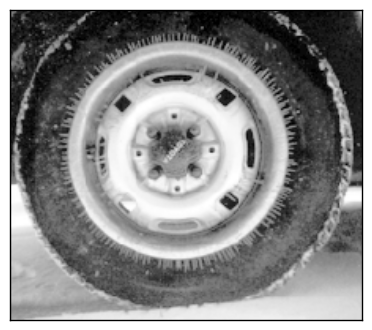

In [76]:
show(img, cmap='gray')